In [1]:
from rocketpy import Environment, Rocket, Flight, Fluid, LiquidMotor, CylindricalTank, MassFlowRateBasedTank
import datetime
from math import exp


Gravity Details

Acceleration of gravity at surface level:    9.7970 m/s²
Acceleration of gravity at  78.920 km (ASL): 9.5586 m/s²


Launch Site Details

Launch Date: 2025-11-10 12:00:00 UTC
Launch Site Latitude: 35.34700°
Launch Site Longitude: 117.80800°
Reference Datum: SIRGAS2000
Launch Site UTM coordinates: 573419.53 E    3911824.66 N
Launch Site UTM zone: 50S
Launch Site Surface Elevation: 217.0 m


Atmospheric Model Details

Atmospheric Model Type: Forecast
Forecast Maximum Height: 78.920 km
Forecast Time Period: from 2025-11-09 18:00:00 to 2025-11-25 18:00:00 utc
Forecast Hour Interval: 3 hrs
Forecast Latitude Range: From -90.0° to 90.0°
Forecast Longitude Range: From 0.0° to 359.75°

Surface Atmospheric Conditions

Surface Wind Speed: 1.66 m/s
Surface Wind Direction: 170.41°
Surface Wind Heading: 350.41°
Surface Pressure: 996.71 hPa
Surface Temperature: 283.76 K
Surface Air Density: 1.224 kg/m³
Surface Speed of Sound: 337.69 m/s


Earth Model Details

Earth Radius at Launch s

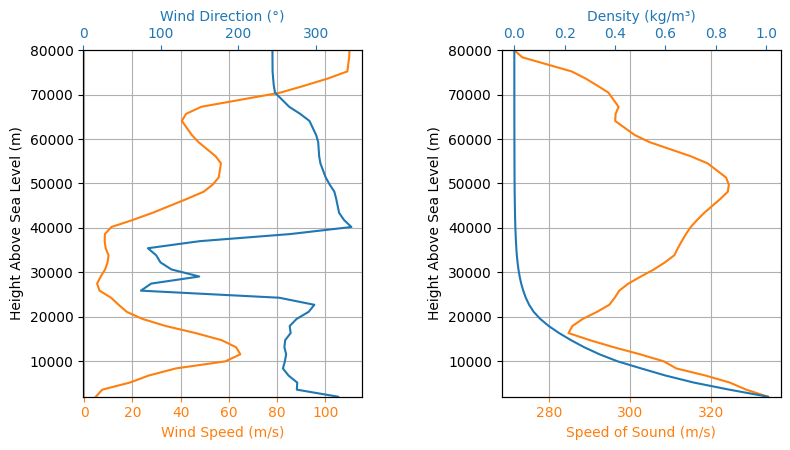

In [2]:
# Environment definition
#date = datetime(2026, 5, 23, 18) Actual launch date
tomorrow = datetime.date.today() + datetime.timedelta(days=1)
env = Environment(latitude=35.347, longitude=117.808, elevation=2000)
env.set_date (
    (tomorrow.year, tomorrow.month, tomorrow.day, 12)
)
env.set_atmospheric_model(type="Forecast", file="GFS")
env.info()

In [3]:
# Define fluids
oxidizer_liq = Fluid(name="LOX", density=1096.9997917)
oxidizer_gas = Fluid(name="GOX", density=4.3871) #literally no clue how accurate this is got it from here tho: https://webbook.nist.gov/cgi/fluid.cgi?T=90&PLow=&PHigh=3.0677043723391&PInc=&Digits=5&ID=C7782447&Action=Load&Type=IsoTherm&TUnit=K&PUnit=MPa&DUnit=kg%2Fm3&HUnit=kJ%2Fmol&WUnit=m%2Fs&VisUnit=uPa*s&STUnit=N%2Fm&RefState=DEF
fuel_liq = Fluid(name="kerosene_l", density=819.99862279)
fuel_gas = Fluid(name="kerosene_g", density=798.71) #check value, idk if its even needed tho
pressurant = Fluid(name="N2", density=35.092168658)

# Define tanks geometry
lox_shape = CylindricalTank(radius = 0.1016, height = 0.508, spherical_caps = True) #from bs early november 2025 openrocket
kero_shape = CylindricalTank(radius = 0.1016, height = 0.508, spherical_caps = True) #from bs early november 2025 openrocket
n2_shape = CylindricalTank(radius = 0.1016, height = 0.584, spherical_caps = True) #from bs early november 2025 openrocket

# Define tanks
oxidizer_tank = MassFlowRateBasedTank(
    name="oxidizer tank",
    geometry=lox_shape,
    flux_time=10,
    initial_liquid_mass= 6.082376233039845,
    initial_gas_mass=0, #not real, just makes life easier
    liquid_mass_flow_rate_in=0,
    liquid_mass_flow_rate_out=0.6082376233039845,
    gas_mass_flow_rate_in=0,
    gas_mass_flow_rate_out=0,
    liquid=oxidizer_liq,
    gas=oxidizer_gas,
)

fuel_tank = MassFlowRateBasedTank(
    name="fuel tank",
    geometry=kero_shape,
    flux_time=10,
    initial_liquid_mass= 4.344554453005255,
    initial_gas_mass=0, #not real, just makes life easier (altho maybe more real than 0 GOX)
    liquid_mass_flow_rate_in=0,
    liquid_mass_flow_rate_out=0.4344554453005255,
    gas_mass_flow_rate_in=0,
    gas_mass_flow_rate_out=0,
    liquid=fuel_liq,
    gas=fuel_gas,
)

pressurant_tank = MassFlowRateBasedTank(
    name="Pressurant Tank",
    geometry=n2_shape,
    flux_time=10,
    initial_liquid_mass=0,
    initial_gas_mass=.48, #6.640451661 is bs number from bs OR tank volume and PV = nRT at ~4500 psi and room temp but i can't use it because its overfilling the tank or some shit idk
    liquid_mass_flow_rate_in=0,
    liquid_mass_flow_rate_out=0,
    gas_mass_flow_rate_in=0,
    gas_mass_flow_rate_out= (.48/10),
    gas=pressurant,
    liquid=pressurant,
)

# Evolution of the Tank center of mass position
oxidizer_tank.center_of_mass.plot()
fuel_tank.center_of_mass.plot()

ValueError: Input Function image (np.float64(-1.5818672186451745e-18), np.float64(0.01367826550356482)) must be within the domain of the Function (np.float64(0.0), np.float64(0.016742158636024383)).

In [ ]:
liquid_motor = LiquidMotor(
    thrust_source="thrust_filtered_only.csv",
    center_of_dry_mass_position=0,
    dry_inertia=(0, 0, 0),
    dry_mass=0,
    burn_time=10,
    nozzle_radius=0.03088,
    nozzle_position=-1.143,
    coordinate_system_orientation="nozzle_to_combustion_chamber",
)

liquid_motor.add_tank(pressurant_tank, position=2.413)
liquid_motor.add_tank(oxidizer_tank, position=1.6256)
liquid_motor.add_tank(fuel_tank, position=0.7874)

liquid_motor.all_info()